In [11]:
from scipy import interpolate    # для интерполяции
from matplotlib.pyplot import *  # для графиков

import numpy as np

Пусть функция $ f(x) $ задана таблично:


| x  | 0 | 1      | 2      | 3       | 4       | 5       | 6       |
|----|---|--------|--------|---------|---------|---------|---------|
|f(x)| 0 | 0.8415 | 0.9093 | 0.1411  | -0.7568 | -0.9589 | -0.2794 |


Такие данные могли быть получены например в результате проведения эксперимента, в котором было измерено две величины: x и y=f(x). Известно, что эти величины взаимосвязаны, но точная формула неизвестна

In [12]:
# для начала запишем эти данные в переменные:
X = [0, 1,       2,      3,       4,       5,       6]
Y = [0, 0.8415,  0.9093, 0.1411, -0.7568, -0.9589, -0.2794]

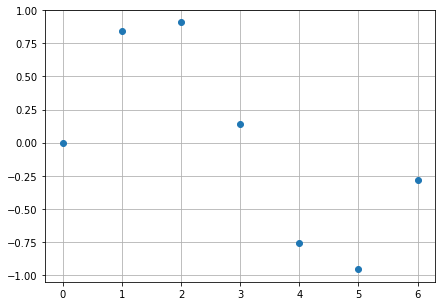

In [13]:
# Потом построим график по точкам

figure( figsize=(7,5) )  # размер изображения
plot(X,Y, 'o')   # построить график из точек
grid()           # изобразить сетку

Какие значения будет принимать функция для значений x не приведённых в таблице? 

Например: чему равны  $f(0.5)$ или $f(3.1)$?

Процесс определения значения таблично заданной функции на интервалах *внутри* заданного таблицей диапазона называется **интерполированием**.

Пару значения аргумента - значение функции называют **узлом интерполяции**

Один из самых простых способов интерполирования - *линейное интерполирование*. Точки с известными значениями просто соединяются прямой.

**Аппроксимация** - (от лат. proxima — ближайшая) или приближение — научный метод, состоящий в замене одних объектов другими, в каком-то смысле близкими к исходным, но более простыми. 

**Экстраполяция**, экстраполирование (от лат. extrā — вне, снаружи, за, кроме и лат. polire — приглаживаю, выправляю, изменяю, меняю[1]) — особый тип аппроксимации, при котором функция аппроксимируется вне заданного интервала, а не между заданными значениями. 

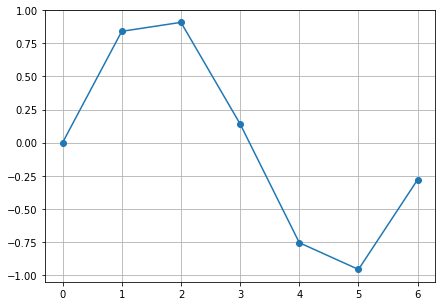

In [14]:
# построим график для такого способа интерполяции просто соеденив точки прямыми

figure( figsize=(7,5) )  # размер изображения
plot(X,Y, 'o-')   # построить график из точек
grid()           # изобразить сетку

Интерполируем значение функции на участке между точками $( x 0 , f ( x 0 ) );  (x_1, f(x_1))$


Для этого построим прямую, проходящую через эти две точки.

Уравнение прямой:


$$ \frac {y-f(x_{0})} {f(x_{1})-f(x_{0})} = \frac {x-x_{0}}{x_{1}-x_{0}}  $$


In [15]:
from sympy import symbols, solve     # для сивольных вычислений

y = symbols('y')                     # задаётся переменная, значение которой нужно вычислить

# Подставим две точки из таблицы: x0 = 0, f(x0) = 0, x1 = 1, f(x1) = 0.8415
# и интерполируем значение функции в точке 0.5, т.е. найдём f(0.5)

x = 0.5                              
solve( (y - 0)/(0.8415 - 0) - (x - 0)/(1 - 0) )   # решение уравнения

[0.420750000000000]

In [16]:
# функция python для интерполяции
help(interpolate.interp1d)

Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``.  This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Note that calling `interp1d` with NaNs present in input values results in
 |  undefined behaviour.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string
 |      ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
 |      'previous', 'next', where 'zero', 'slinear', 'quadratic' and 'cubic'
 |      refer to a spline interpolation of zer

In [17]:
func = interpolate.interp1d(X, Y, kind='linear')

In [18]:
func(0.5)

array(0.42075)

In [19]:
func(3.1)

array(0.05131)

# Интерполяция многочленом

- Линейная интерполяция в конце концов задаёт ломаную, однако зависимости между многими величинами - гладкие функции
- Для того чтобы получить гладкую интерполирующую кривую можно помимо прочих способов использовать интерполяционный многочлен:

$ f(x) = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n $ 

- Однако стоит помнить, что многочлены больших порядков могут давать большую ошибку из-за осциляции

# Cплайн интерполяция

- Кроме того, можно интерполировать табличную функцию частями задавая отдельный каждый многочлне для каждого участка. Участками могут быть интервалы, на концах которых известны значения функции, то есть значения таблично заданной функции
- Для кажого участка подбирается свой многочлен - это кусочно заданная функция
- Порядок многочлена на каждом участке тоже может отличатся, но не должен превышать заданный
- Такой способ интерполяции называется интерполяцией сплайном.

TODO: картинка с википедии

In [20]:
# построим кубический ( kind='cubic' ) многолен по табличным данным
# функция interp1d построит многочлен для каждого участка табличных данных
func_3 = interpolate.interp1d(X, Y, kind='cubic')

In [21]:
# далее можно вычислить значения аппроксимирующей функции в промежуточных точках
func_3(0.5)

array(0.50194766)

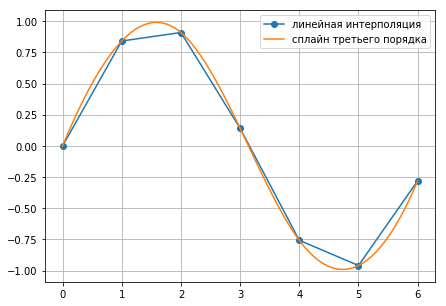

In [22]:
X1 = np.linspace(0, 6, 100) # создадим набор из 100 значений на отрезке от 0 до 6 (чтобы по ним потроить график)
Y1 = func_3(X1)              

figure( figsize=(7,5) )
plot(X,  Y,   'o-', label = 'линейная интерполяция')
plot(X1, Y1,        label = 'сплайн третьего порядка')
legend()    # покажем подписи к графикам
grid()

### Другие способы интерполяции

### Метод наименьших квадратов

- Как по табличным данным построить интерполирующий многочлен?

## Интерполирование vs регрессия
- Стоит отметить, что уравнение регресии может быть не только прямой линией
- при интреполировании интерполяционная функция должна строго соответствовать точкам
- уравнение регресии должно как можно лучше соответствовать всем точкам, но может не удовлетворять им
- Одному значению аргумента в данных, по которям строится уравнение регресии, может соответствовать несколько значений функции.